In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('banklist.csv', encoding='latin1')

In [20]:
df.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,03-Nov-23,10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",01-May-23,10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
4,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,10-Mar-23,10539


In [21]:
# Convert 'Closing Date' to datetime
df['Closing Date'] = pd.to_datetime(df['Closing Date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14768\337198168.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closing Date'] = pd.to_datetime(df['Closing Date'])


In [23]:
# Temporal Analysis: Bank closures trend over time
df['Year'] = df['Closing Date'].dt.year
temporal_analysis = df.groupby('Year').size()

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


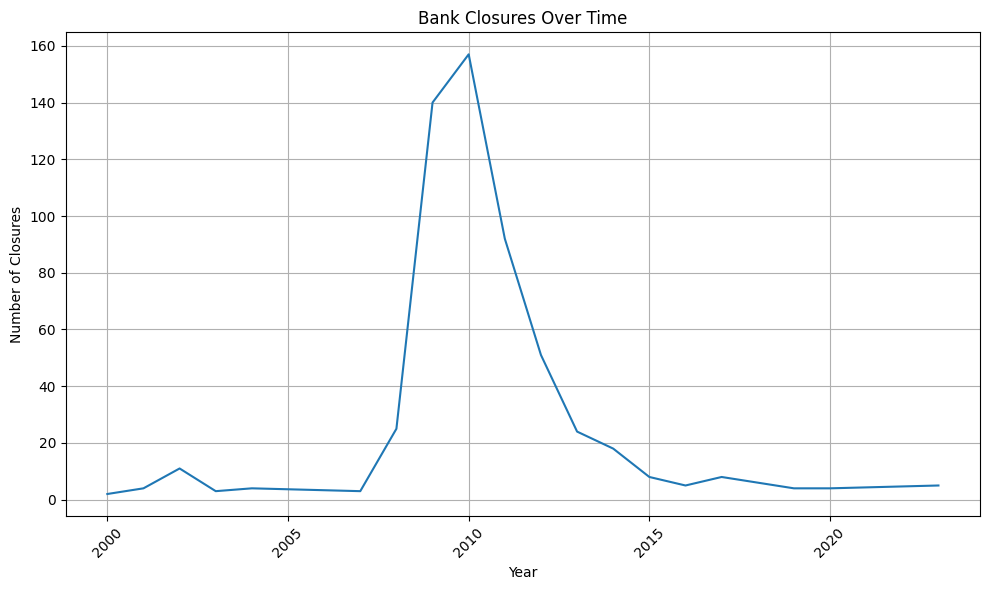

In [24]:
# Plot temporal analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x=temporal_analysis.index, y=temporal_analysis.values)
plt.title('Bank Closures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

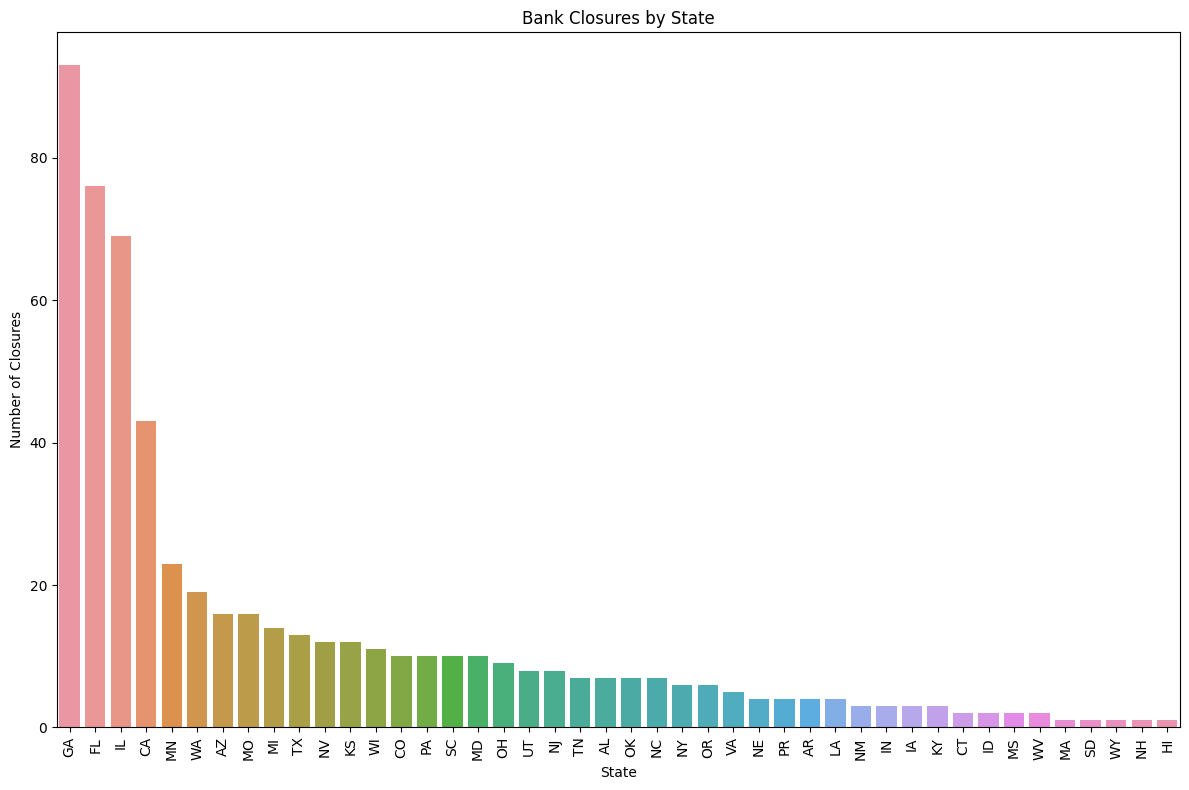

In [25]:
# Geographical Analysis: Distribution of bank closures across states
geographical_analysis = df['State'].value_counts()

# Plot geographical analysis
plt.figure(figsize=(12, 8))
sns.barplot(x=geographical_analysis.index, y=geographical_analysis.values)
plt.title('Bank Closures by State')
plt.xlabel('State')
plt.ylabel('Number of Closures')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

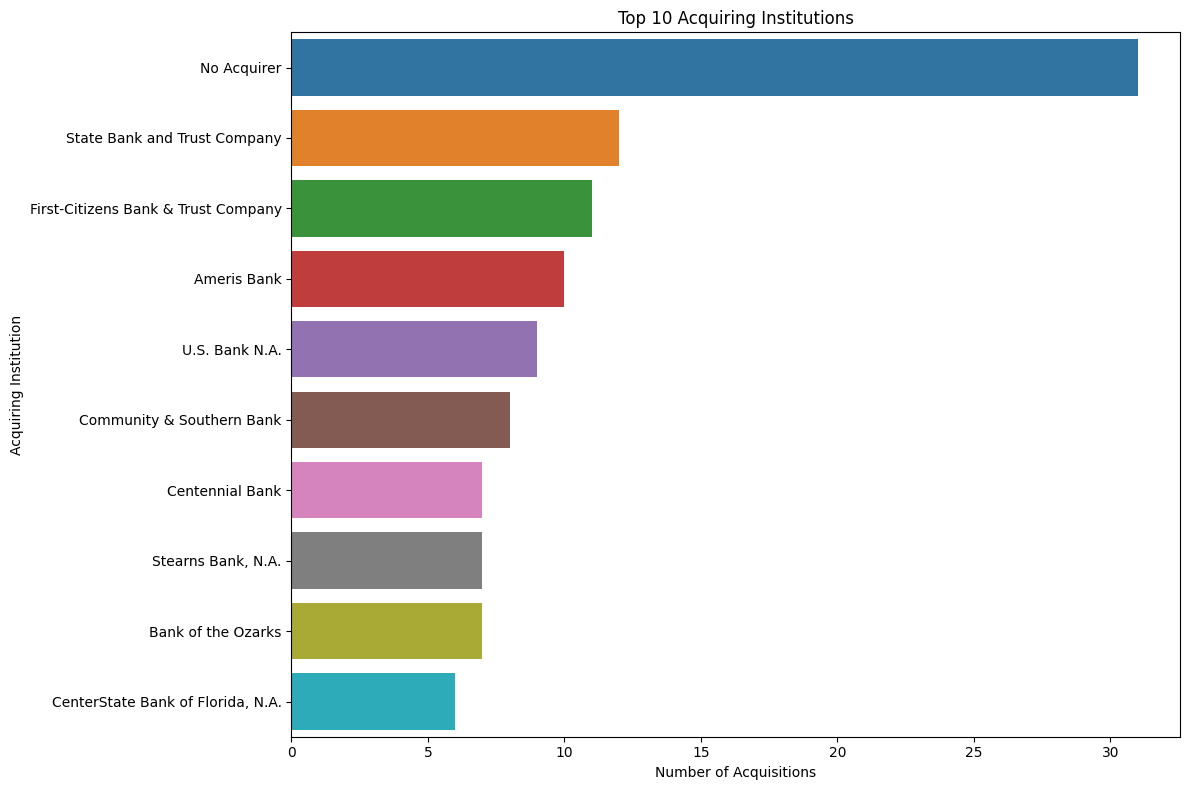

In [27]:
# Institutional Analysis: Most active acquiring institutions
institutional_analysis = df['Acquiring Institution'].value_counts().head(10)

# Plot institutional analysis
plt.figure(figsize=(12, 8))
sns.barplot(x=institutional_analysis.values, y=institutional_analysis.index, orient='h')
plt.title('Top 10 Acquiring Institutions')
plt.xlabel('Number of Acquisitions')
plt.ylabel('Acquiring Institution')
plt.tight_layout()
plt.show()

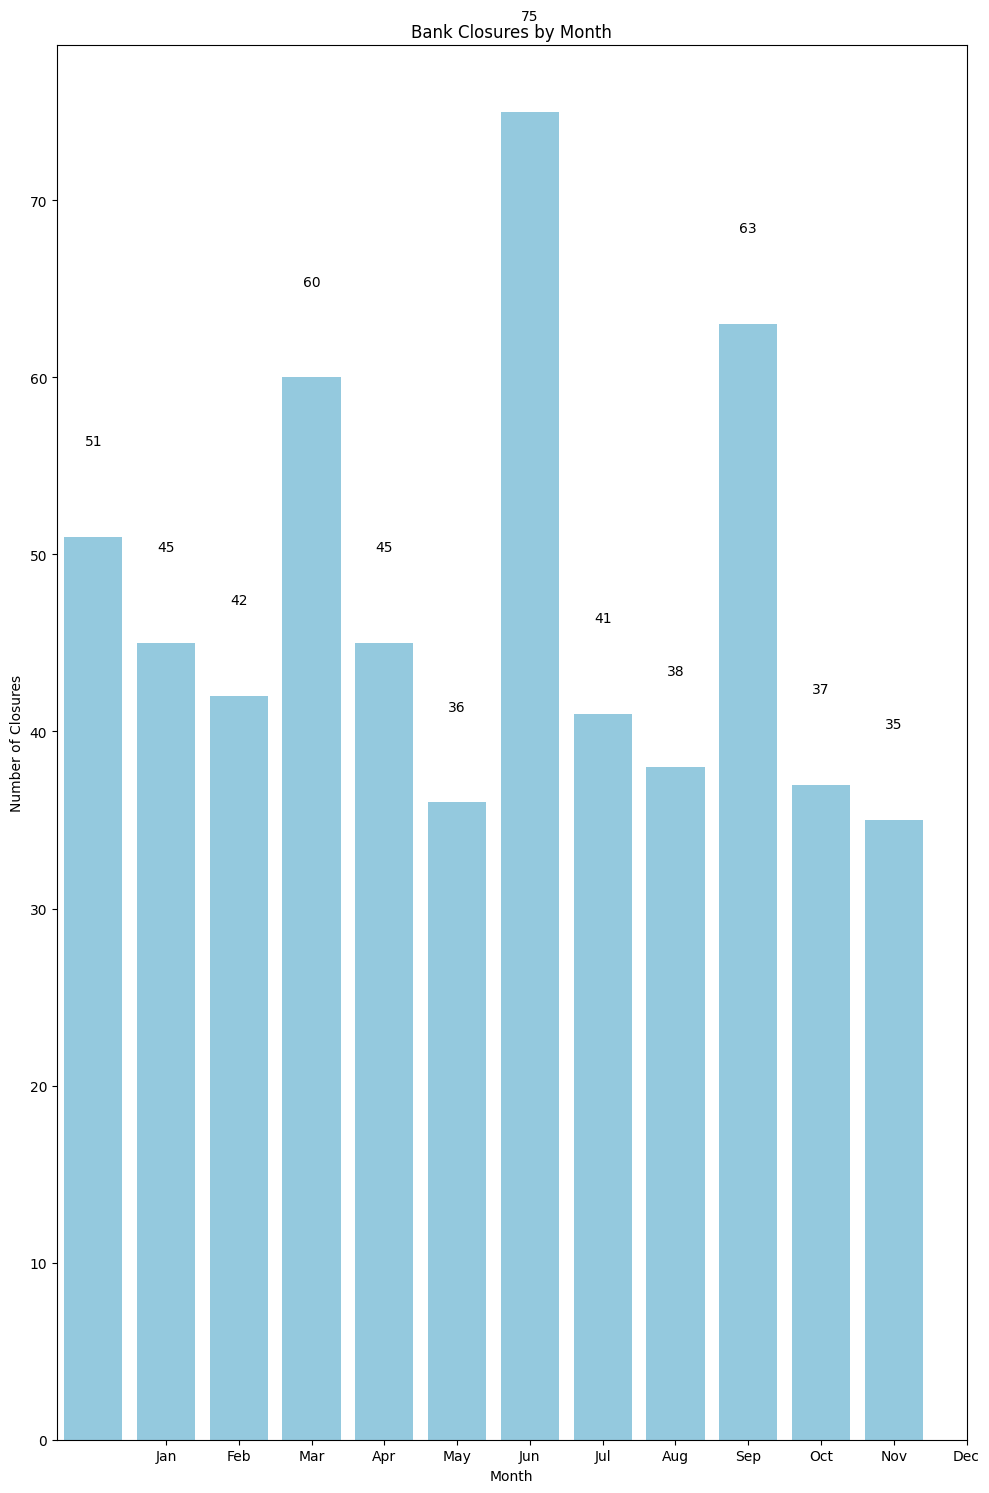

In [32]:
# Distribution of bank closures by month
df['Month'] = df['Closing Date'].dt.month
monthly_analysis = df['Month'].value_counts().sort_index()

# Plot distribution of bank closures by month
plt.figure(figsize=(10, 15))
sns.barplot(x=monthly_analysis.index, y=monthly_analysis.values, color='skyblue')
plt.title('Bank Closures by Month')
plt.xlabel('Month')
plt.ylabel('Number of Closures')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, value in enumerate(monthly_analysis.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()